<a href="https://colab.research.google.com/github/Rajat-Singh-Chouhan/oil-well-log/blob/main/lithology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ds=pd.read_csv("/content/lithology_input.csv")

In [ ]:
ds.head()

,gamma ray,density,neutron porosity,lithology
0,73.59512,2.58541,0.37612,limestone
1,73.97836,2.55129,0.41289,limestone
2,72.04334,2.57068,0.38331,limestone
3,72.76338,2.60603,0.37881,limestone
4,66.89448,2.59872,0.39401,limestone


In [ ]:
ds_limestone=ds.loc[ds["lithology"]=="limestone"]
ds_dolomite=ds.loc[ds["lithology"]=="dolomite"]
ds_shale=ds.loc[ds["lithology"]=="shale"]
ds_sandstone=ds.loc[ds["lithology"]=="sandstone"]

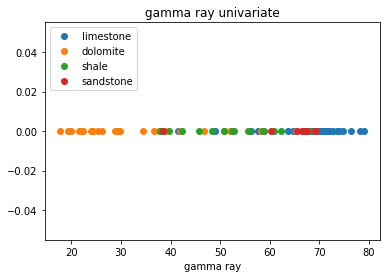

In [ ]:
plt.plot(ds_limestone["gamma ray"],np.zeros_like(ds_limestone["gamma ray"]),"o")
plt.plot(ds_dolomite["gamma ray"],np.zeros_like(ds_dolomite["gamma ray"]),"o")
plt.plot(ds_shale["gamma ray"],np.zeros_like(ds_shale["gamma ray"]),"o")
plt.plot(ds_sandstone["gamma ray"],np.zeros_like(ds_sandstone["gamma ray"]),"o")
plt.title("gamma ray univariate")
plt.xlabel("gamma ray")
plt.legend(['limestone', 'dolomite','shale','sandstone'], loc='upper left')

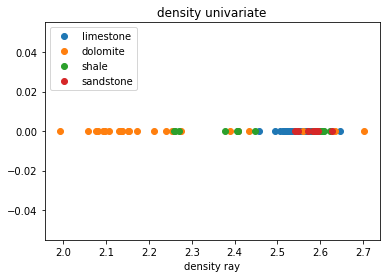

In [ ]:
plt.plot(ds_limestone["density"],np.zeros_like(ds_limestone["density"]),"o")
plt.plot(ds_dolomite["density"],np.zeros_like(ds_dolomite["density"]),"o")
plt.plot(ds_shale["density"],np.zeros_like(ds_shale["density"]),"o")
plt.plot(ds_sandstone["density"],np.zeros_like(ds_sandstone["density"]),"o")
plt.title("density univariate")
plt.xlabel("density ray")
plt.legend(['limestone', 'dolomite','shale','sandstone'], loc='upper left')

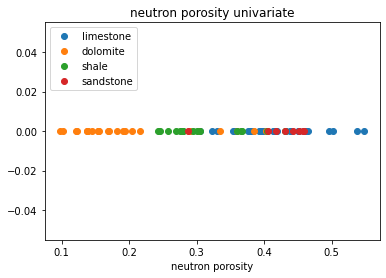

In [ ]:
plt.plot(ds_limestone["neutron porosity"],np.zeros_like(ds_limestone["neutron porosity"]),"o")
plt.plot(ds_dolomite["neutron porosity"],np.zeros_like(ds_dolomite["neutron porosity"]),"o")
plt.plot(ds_shale["neutron porosity"],np.zeros_like(ds_shale["neutron porosity"]),"o")
plt.plot(ds_sandstone["neutron porosity"],np.zeros_like(ds_sandstone["neutron porosity"]),"o")
plt.title("neutron porosity univariate")
plt.xlabel("neutron porosity")
plt.legend(['limestone', 'dolomite','shale','sandstone'], loc='upper left')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


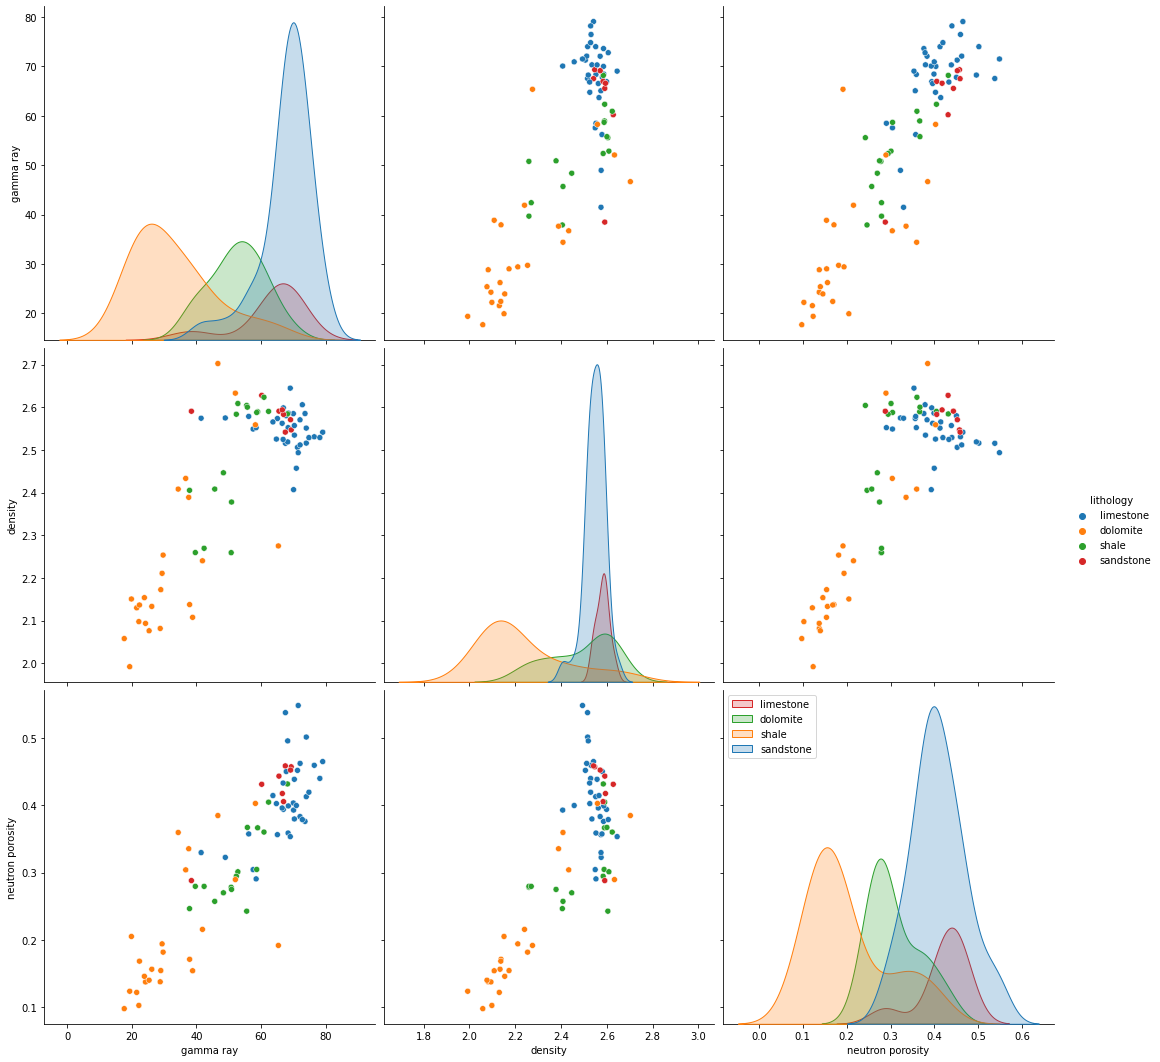

In [ ]:
sns.pairplot(ds, hue="lithology", size=5)
plt.legend(['limestone', 'dolomite','shale','sandstone'], loc='upper left')


ANN algorithm suitable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df=pd.read_csv("/content/lithology_output.csv")
df.head()

,limestone,dolomite,shale,sandstone
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
x=ds.loc[:, ds.columns != "lithology"]
y=df.loc[:, ["limestone","dolomite","shale","sandstone"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 42)

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=3, kernel_initializer="normal", activation="relu" ))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 16        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="BinaryCrossentropy", optimizer="adam")
result=model.fit(x_train, y_train, epochs=500, verbose= 1, batch_size = 5, validation_split=0.1) 

Epoch 1/500
13/13 [==============================] - 1s 17ms/step - loss: 0.6921 - val_loss: 0.6902
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6895 - val_loss: 0.6874
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6869 - val_loss: 0.6849
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6844 - val_loss: 0.6824
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6819 - val_loss: 0.6796
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6794 - val_loss: 0.6770
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6770 - val_loss: 0.6745
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6746 - val_loss: 0.6719
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6722 - val_loss: 0.6695
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6699 - val_loss: 0.6670
Epoch 11

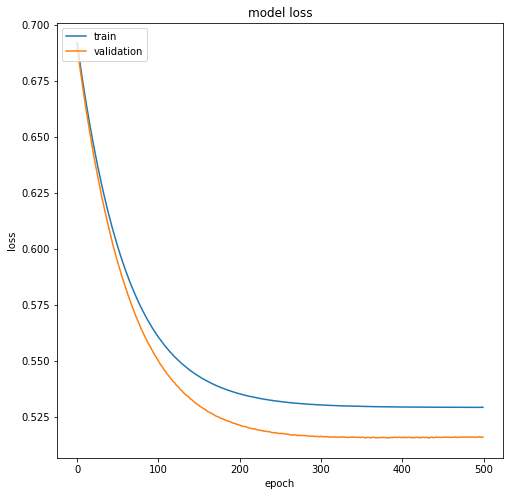

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(y_pred)

[[0.40486494 0.33080053 0.07414582 0.19018865]
 [0.40486494 0.33080053 0.07414582 0.19018865]
 [0.40486494 0.33080053 0.07414582 0.19018865]
 [0.40486494 0.33080053 0.07414582 0.19018865]
 [0.40486494 0.33080053 0.07414582 0.19018865]
 [0.40486494 0.33080053 0.07414582 0.19018865]
 [0.40486494 0.33080053 0.07414582 0.19018865]
 [0.40486494 0.33080053 0.07414582 0.19018865]
 [0.40486494 0.33080053 0.07414582 0.19018865]]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report